In [1]:
%matplotlib inline
import pandas as pd
from getdist import plots
from getdist import MCSamples

import matplotlib.pyplot as plt
import numpy as np
from cosmosis.postprocess import parser
from cosmosis.postprocessing.inputs import read_input
from cosmosis.postprocessing.postprocess import postprocessor_for_sampler
from cosmosis.postprocessing.plots import (
    MetropolisHastingsPlots2D,
    MetropolisHastingsPlots1D,
)


import math
from IPython.display import display, Math


In [2]:
%matplotlib inline
def generate_triangle_plot(data_path, params):
    """
    Generates a triangle plot for given parameters from the specified data path.
    
    Parameters:
        data_path (str): Path to the input data.
        params (list of tuples): List of tuples containing parameter names and fiducial values.
    """
    
    data_c = [read_input(data_path)][0]
        
    names = [param[0] for param in params]
    labels = [rf"{param[0]}" for param in params]  # LaTeX-style labels
    fiducial_values = {param[0]: param[1] for param in params}
    
    settings = {
        "mult_bias_correction_order": 0,
        "smooth_scale_2D": 3,
        "smooth_scale_1D": 3,
        "boundary_correction_order": 0,
    }
    data_so = [[line[i] for i in range(len(params))] for line in data_c[1]["data"][1][0]]   
    sample_red = MCSamples(samples=np.array(data_so[int(len(data_so) * 0.3) : ]), names=names, labels=labels, settings=settings)
    print(len(data_so))
    # Triangle plot
    g = plots.get_subplot_plotter()
    g.triangle_plot(
        [sample_red],
        filled=True,
        alphas=[0.8, 0.55],
        contour_ls="-",
        contour_lws=1,
        fine_bins=1,
        marker_args={"linewidth": 4},
        markers=fiducial_values,
    )
    plt.savefig(f'{data_path.replace('number_counts_samples.txt','triangle_plot.png')}')
    plt.show()

    print(fiducial_values)
    print("\n Using data from both \n")
    for param_name in names:
        display(Math(sample_red.getInlineLatex(param_name, limit=1)))
    return data_so

LOADING CHAIN FROM FILE:  /pbs/home/e/ebarroso/CLPipeline/examples/cosmoDC2-20deg2/outputs/output_rp_tjpc/number_counts_samples.txt
Removed no burn in
28400


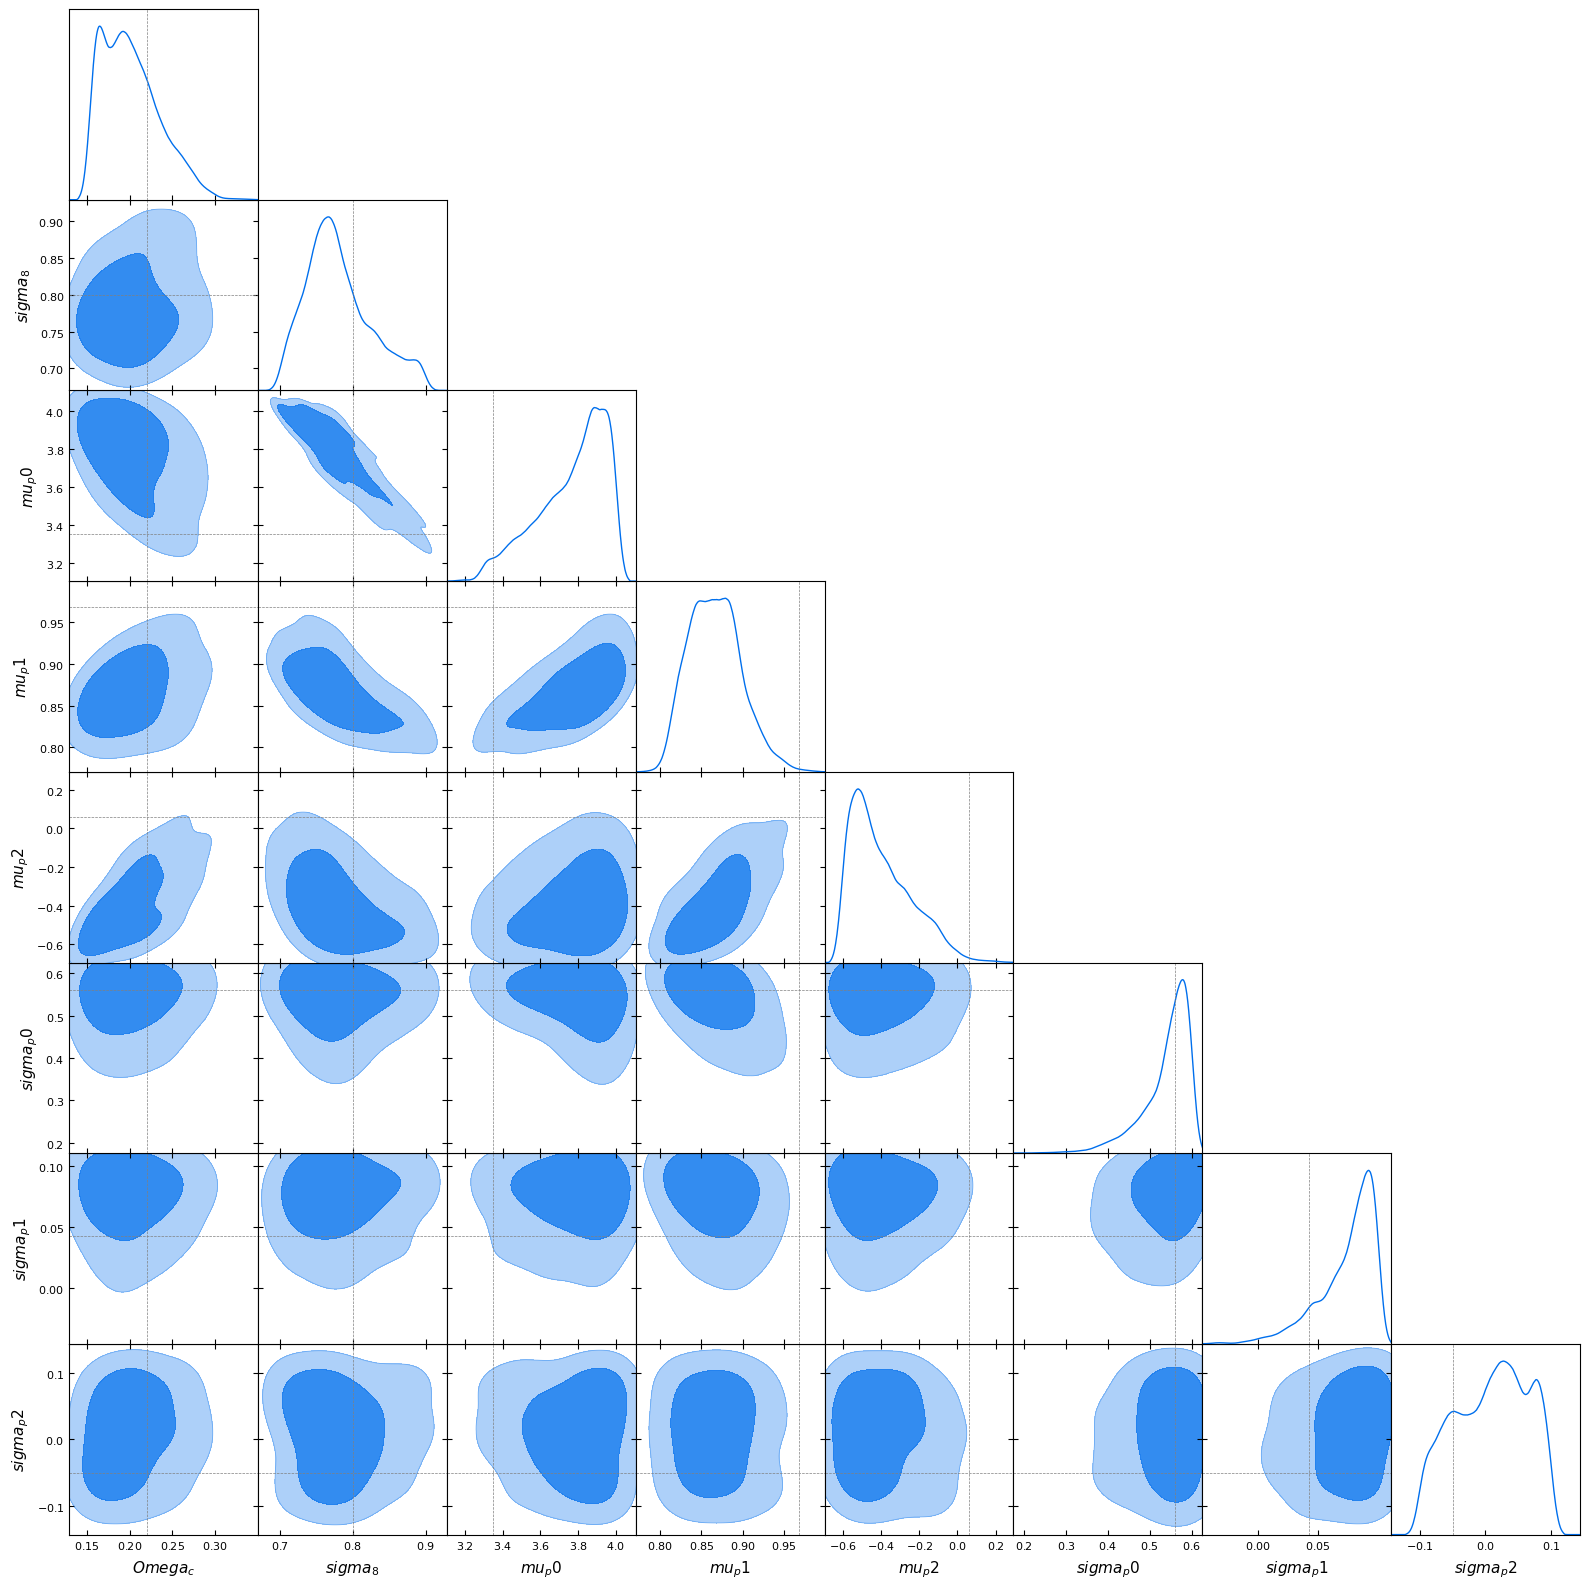

{'Omega_c': 0.22, 'sigma_8': 0.8, 'mu_p0': 3.35, 'mu_p1': 0.968, 'mu_p2': 0.06, 'sigma_p0': 0.56, 'sigma_p1': 0.043, 'sigma_p2': -0.05}

 Using data from both 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /pbs/home/e/ebarroso/CLPipeline/examples/wazp_cosmoDC2/outputs/output_rp_tjpc/number_counts_samples.txt
Removed no burn in
15600


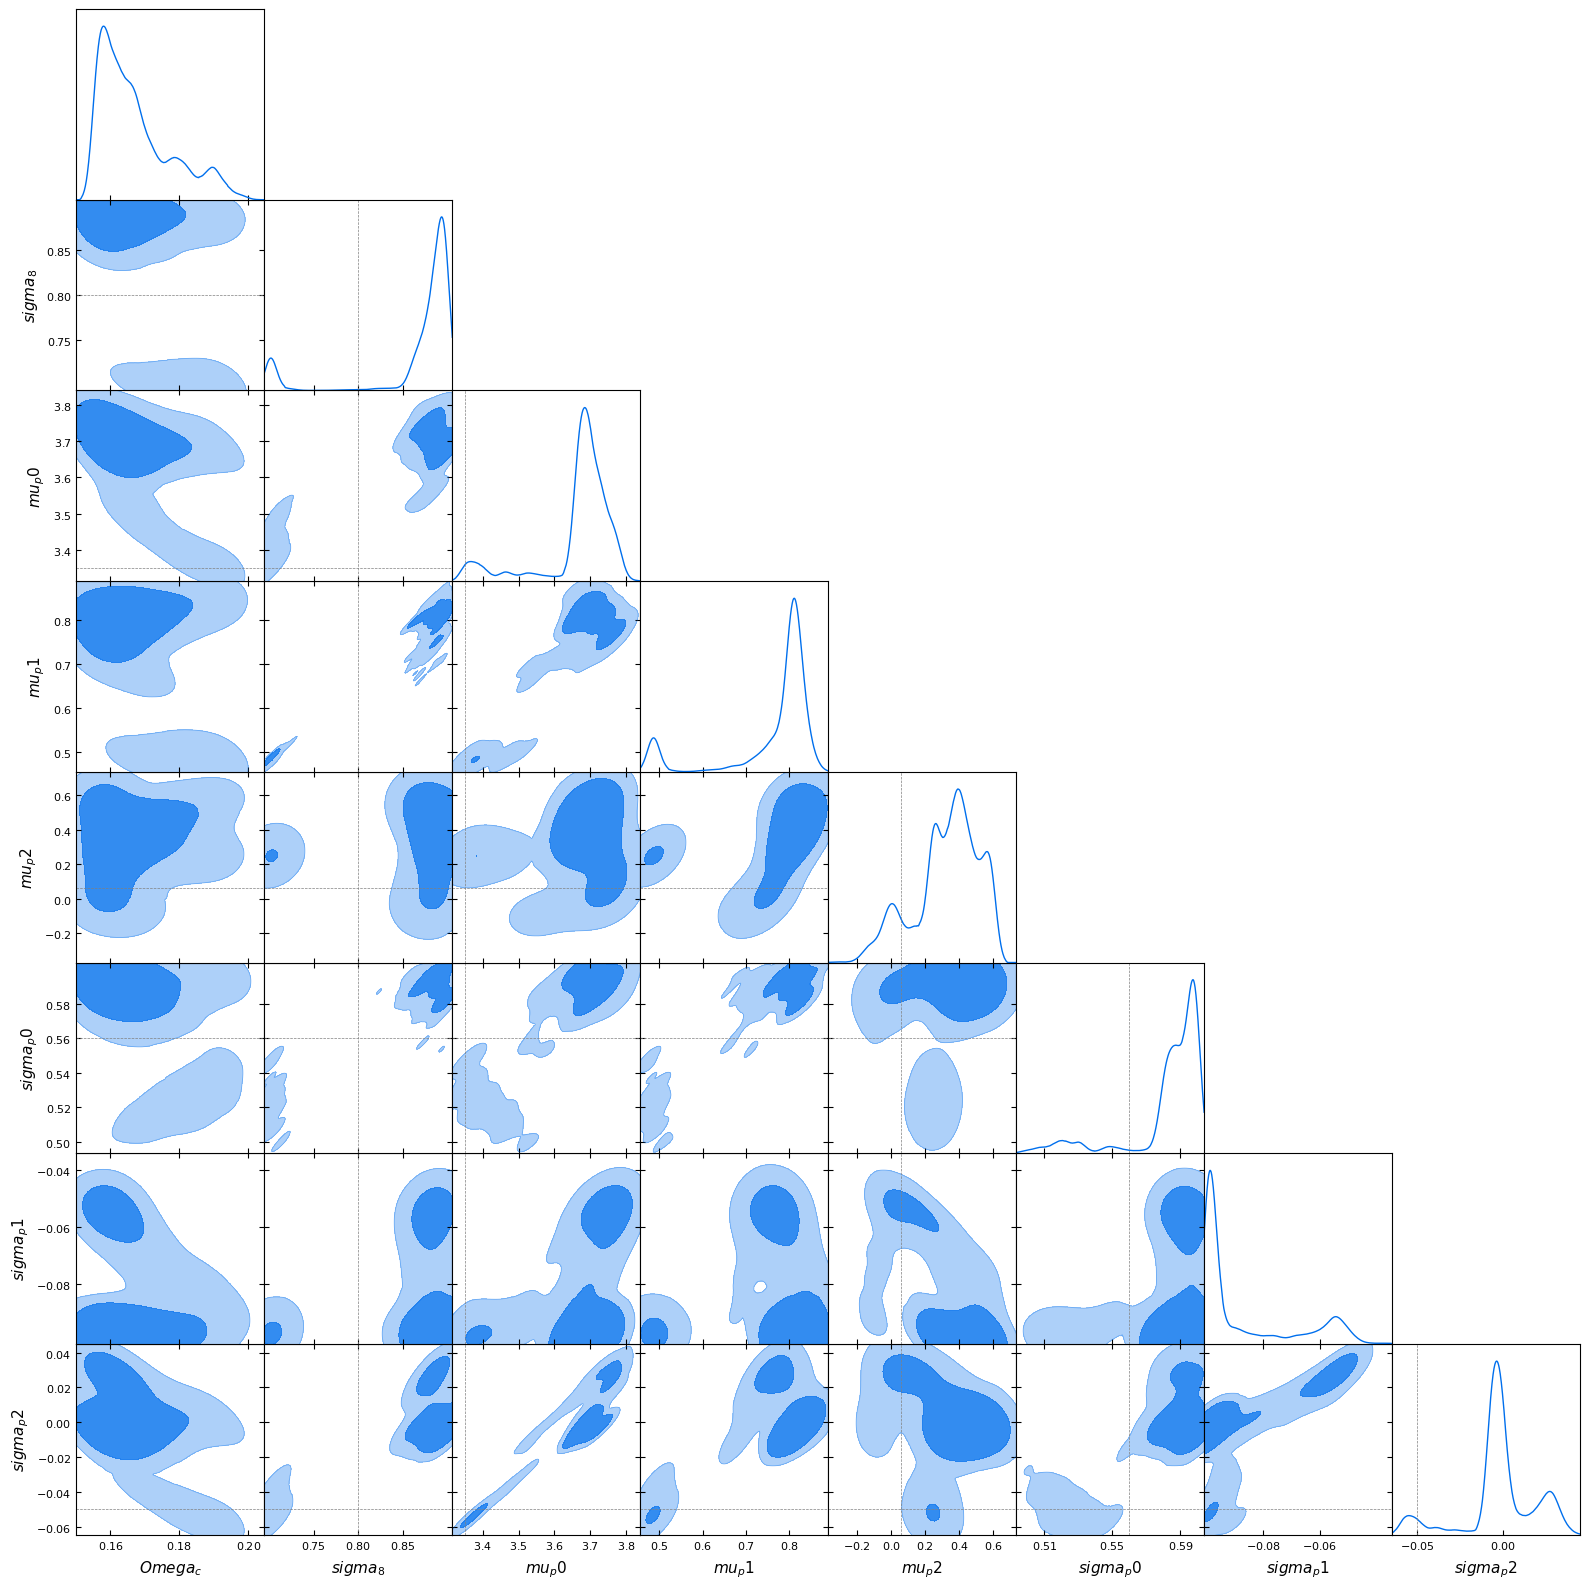

{'Omega_c': 0.22, 'sigma_8': 0.8, 'mu_p0': 3.35, 'mu_p1': 0.968, 'mu_p2': 0.06, 'sigma_p0': 0.56, 'sigma_p1': 0.043, 'sigma_p2': -0.05}

 Using data from both 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /pbs/home/e/ebarroso/CLPipeline/examples/SDSS_data/outputs/output_rp/number_counts_samples.txt
Removed no burn in
23600


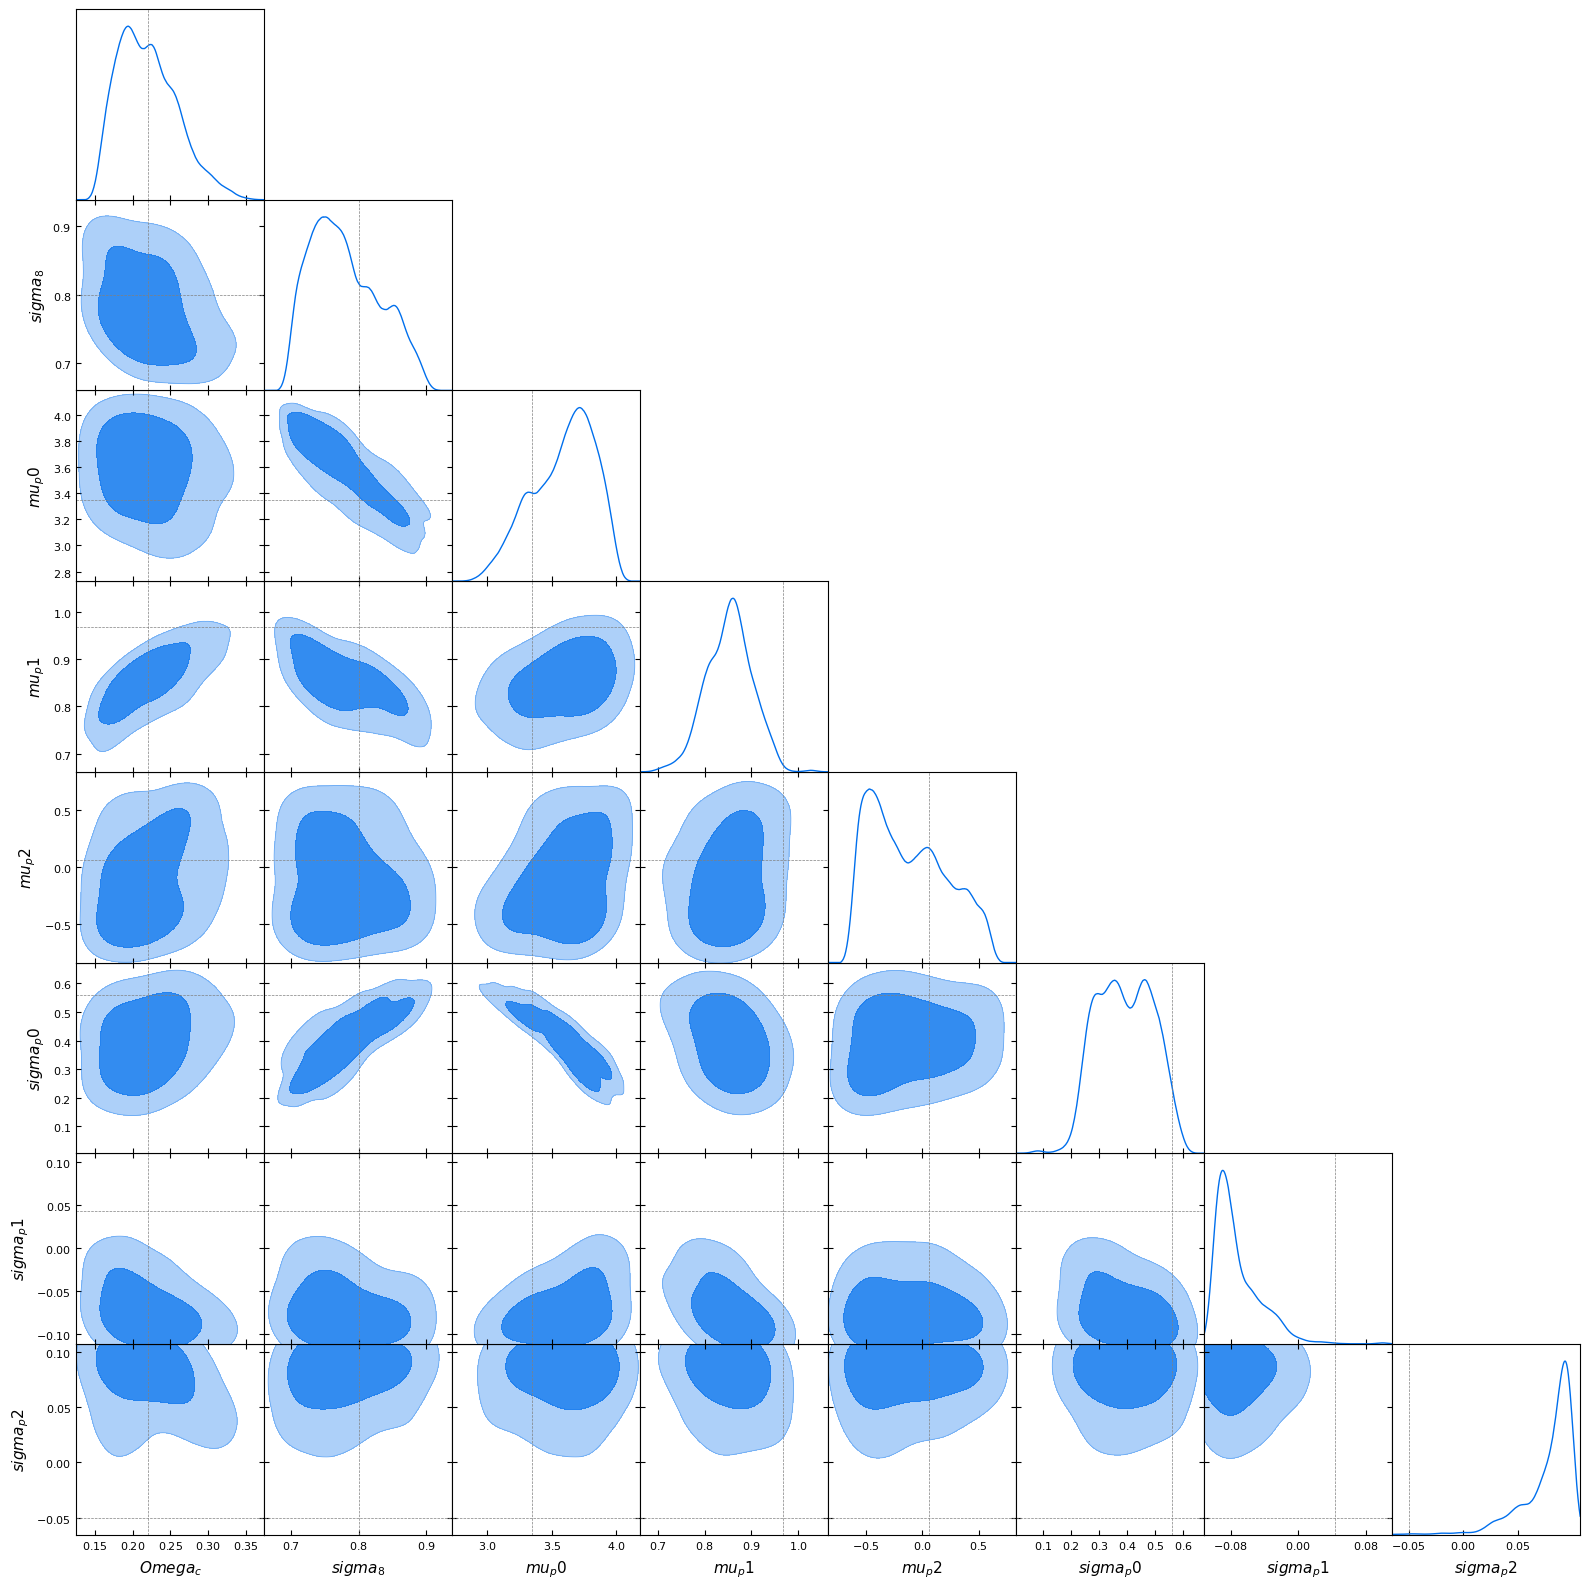

{'Omega_c': 0.22, 'sigma_8': 0.8, 'mu_p0': 3.35, 'mu_p1': 0.968, 'mu_p2': 0.06, 'sigma_p0': 0.56, 'sigma_p1': 0.043, 'sigma_p2': -0.05}

 Using data from both 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[[0.2052374723334512,
  0.7998388732154939,
  3.0018791652085732,
  0.8011857083225218,
  -0.30010815199748925,
  0.30000481483139285,
  -0.01992972103395646,
  0.060101389811420186],
 [0.2050380331410152,
  0.7999890103678554,
  2.999791418593623,
  0.8009414005254383,
  -0.30212596993499763,
  0.30005651358143837,
  -0.020273182635392004,
  0.06035073937788252],
 [0.20501428351064238,
  0.8003115309714884,
  2.9991848854145187,
  0.8009777952711171,
  -0.29954482473078814,
  0.3001939924320193,
  -0.020391202657356278,
  0.060226848583462105],
 [0.20508183711087372,
  0.799893389901214,
  3.005734933475301,
  0.7988597298668139,
  -0.2971317445037885,
  0.29933373289662374,
  -0.0194447015221922,
  0.0599712100147233],
 [0.20545794633447184,
  0.7998582037710611,
  2.998977531702781,
  0.8022060196638618,
  -0.30213868215571954,
  0.29960799095576385,
  -0.019982869421566105,
  0.05993315610661279],
 [0.20516756293344496,
  0.8000766256975941,
  2.996011396581352,
  0.799745695723959

In [5]:
generate_triangle_plot("/pbs/home/e/ebarroso/CLPipeline/examples/cosmoDC2-20deg2/outputs/output_rp_tjpc/number_counts_samples.txt", [
    ("Omega_c", 0.22),
    ("sigma_8", 0.800),
    ("mu_p0",3.35),
    ("mu_p1", 0.968),
    ("mu_p2", 0.06),
    ("sigma_p0", 0.56),
    ("sigma_p1", 0.043),
    ("sigma_p2", -0.05)
])
generate_triangle_plot("/pbs/home/e/ebarroso/CLPipeline/examples/wazp_cosmoDC2/outputs/output_rp_tjpc/number_counts_samples.txt", [
    ("Omega_c", 0.22),
    ("sigma_8", 0.800),
    ("mu_p0",3.35),
    ("mu_p1", 0.968),
    ("mu_p2", 0.06),
    ("sigma_p0", 0.56),
    ("sigma_p1", 0.043),
    ("sigma_p2", -0.05)
])

generate_triangle_plot("/pbs/home/e/ebarroso/CLPipeline/examples/SDSS_data/outputs/output_rp/number_counts_samples.txt", [
    ("Omega_c", 0.22),
    ("sigma_8", 0.800),
    ("mu_p0",3.35),
    ("mu_p1", 0.968),
    ("mu_p2", 0.06),
    ("sigma_p0", 0.56),
    ("sigma_p1", 0.043),
    ("sigma_p2", -0.05)
])

In [106]:
from firecrown.models.cluster.recipes.murata_binned_spec_z import MurataBinnedSpecZRecipe as MDS
from firecrown.models.cluster.abundance import ClusterAbundance
from firecrown.models.cluster.abundance import ClusterAbundance
from firecrown.models.cluster.properties import ClusterProperty
from firecrown.likelihood.binned_cluster_number_counts import BinnedClusterNumberCounts
from firecrown.models.cluster.mass_proxy import MurataBinned
import sacc
import pyccl as ccl
import numpy as np
from firecrown.modeling_tools import ModelingTools

In [262]:
def compare_prediction(path, survey_nm, pivot_mass, pivot_redshift, mu_p0, mu_p1, mu_p2, sigma_p0, sigma_p1, sigma_p2, mass_parameter=False):
    s_read = sacc.Sacc.load_fits(path)

    
    hmf = ccl.halos.MassFuncDespali16()
    min_mass, max_mass = 13., 16.
    min_z, max_z = 0.2, 0.8
    cluster_abundance = ClusterAbundance(min_mass, max_mass, min_z, max_z, hmf)
    cosmo_ccl = ccl.Cosmology(
    Omega_c=0.2052,
    Omega_b=0.0448,
    h=0.71,
    n_s=0.963,
    sigma8=0.8,
    Omega_k=0.0,
    Neff=3.044,
    m_nu=0.0,
    w0=-1.0,
    wa=0.0,
    T_CMB=2.7255
    )
    cluster_abundance.update_ingredients(cosmo_ccl)
    
    modeling_tools = ModelingTools(cluster_abundance=cluster_abundance)
    mds = MDS()
    mds.mass_distribution.pivot_mass = np.log(10**pivot_mass)
    mds.mass_distribution.pivot_redshift = pivot_redshift
    mds.mass_distribution.log1p_pivot_redshift = np.log1p(pivot_redshift)
    mds.mass_distribution.mu_p0 = mu_p0
    mds.mass_distribution.mu_p1 = mu_p1
    mds.mass_distribution.mu_p2 = mu_p2
    mds.mass_distribution.sigma_p0 = sigma_p0
    mds.mass_distribution.sigma_p1 = sigma_p1
    mds.mass_distribution.sigma_p2 = sigma_p2
    print(mds.mass_distribution.pivot_mass, mds.mass_distribution.mu_p0, mds.mass_distribution.sigma_p1, mds.mass_distribution.log1p_pivot_redshift )
    average_on = ClusterProperty.COUNTS
    if mass_parameter:
        average_on |= ClusterProperty.MASS
    bin_cl_theory = BinnedClusterNumberCounts(average_on, survey_nm, mds)
    bin_cl_theory.read(s_read)
    cluster_abundance.update_ingredients(cosmo_ccl)

    prediction = bin_cl_theory._compute_theory_vector(modeling_tools)
    data = bin_cl_theory.data_vector
    print(prediction, data, np.array(prediction)/np.array(data))
    return prediction


In [264]:
sdss_sacc = "/pbs/home/e/ebarroso/CLPipeline/examples/SDSS_data/outputs/clusters_SDSS_sacc_file_cov.sacc"
sdss_survey_name = "SDSSCluster_redshift_richness"
mu_p0, mu_p1, mu_p2, sigma_p0, sigma_p1, sigma_p2 = 3, 0.8, -0.3, 0.3, -0.03, 0.06#3.59 , 0.853 ,-0.12 ,0.39, -0.0715 ,0.0784
pivot_mass = 14.243956661092533#np.log10(np.exp(32.79792227308491))
pivot_redshift = 0.15
print(np.log1p(pivot_redshift))
pred_sdss = compare_prediction(sdss_sacc, sdss_survey_name, pivot_mass, pivot_redshift, mu_p0, mu_p1, mu_p2, sigma_p0, sigma_p1, sigma_p2, mass_parameter=True)
firecronw_sdss = [
    3.810010529951054650e+03,
    1.778417641152090482e+03,
    8.811653712287320559e+02,
    4.418021285586385147e+02,
    2.315527714308784937e+02,
    1.422096277683866994e+01,
    1.439091931628137111e+01,
    1.454690646886041883e+01,
    1.470457132091764763e+01,
    1.491501897507452945e+01
]
print(np.array(firecronw_sdss)/np.array(pred_sdss))

0.13976194237515868
32.79792227308491 3 -0.03 0.13976194237515868
[3808.23032682 1777.41857837  880.56479448  441.44191194  231.31278036
   14.22095042   14.3908998    14.54688474   14.70454924   14.91498467] [3711.    1788.     978.     476.     223.      14.111   14.263   14.38
   14.609   14.928] [1.02620057 0.99408198 0.900373   0.92739897 1.03727704 1.00779182
 1.00896724 1.01160534 1.00654044 0.99912813]
[1.00046746 1.00056209 1.00068204 1.000816   1.00103752 1.00000087
 1.00000136 1.00000149 1.0000015  1.0000023 ]


In [265]:
cosmodc2_20deg_sacc = "/pbs/home/e/ebarroso/CLPipeline/examples/cosmoDC2-20deg2/outputs/clusters_sacc_file_cov.sacc"
deg20_survey_name = 'cosmodc2-20deg2-CL'
mu_p0, mu_p1, mu_p2, sigma_p0, sigma_p1, sigma_p2 = 3, 0.8, -0.3, 0.3, -0.03, 0.06#3.77, 0.867, -0.396, 0.540, -0.0742, 0.009
pivot_mass_dc2 = 14.5
pivot_redshift_dc2 = 0.6
print(np.log1p(pivot_redshift_dc2))
perd = compare_prediction(cosmodc2_20deg_sacc, deg20_survey_name, pivot_mass_dc2, pivot_redshift_dc2, mu_p0, mu_p1, mu_p2, sigma_p0, sigma_p1, sigma_p2)
firecrown_data = [
    1.190934258096919081e+02,
    2.008965488666264889e+02,
    2.284041565009897283e+02,
    3.505237902075013068e+01,
    5.221903553911184304e+01,
    5.138977137113310079e+01,
    4.017131487234456344e+00,
    5.230141207023594419e+00,
    4.391974108503008623e+00,
    4.380773314675710850e+00,
    5.037472847181321711e+00,
    3.685587582742944512e+00
]
print(np.array(firecrown_data)/np.array(perd))


0.4700036292457356
33.38748384841366 3 -0.03 0.4700036292457356
[119.04211446 200.79023756 228.25769319  35.03513286  52.18672436
  51.35066071   4.01458715   5.22598147   4.3876883    4.37727348
   5.03251659   3.6812158 ] [147 376 293  37 120  83   5  14   8   7  25  15] [0.8098103  0.53401659 0.7790365  0.94689548 0.43488937 0.61868266
 0.80291743 0.37328439 0.54846104 0.62532478 0.20130066 0.24541439]
[1.00043104 1.00052946 1.00064166 1.00049225 1.00061915 1.00076164
 1.00063377 1.00079597 1.00097678 1.00079955 1.00098485 1.00118759]
